In [1]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
import numpy as np
import tensorflow as tf
import itertools as it
import scipy.io.wavfile as wavfile
import importlib
from utils import general_utils, audio_utils
importlib.reload(audio_utils)
importlib.reload(general_utils)
tf.enable_eager_execution()


In [18]:

#testData = tf.data.TFRecordDataset("data/nsynth-test.tfrecord")
tf_record_file = "data/nsynth-test.tfrecord"
general_utils.list_data_in_tfrecord(tf_record_file, 2)


RECORD  1 

note_str
bytes_list {
  value: "bass_synthetic_033-100-100"
}

sample_rate
int64_list {
  value: 16000
}

instrument_source
int64_list {
  value: 2
}

qualities
int64_list {
  value: 0
  value: 0
  value: 0
  value: 0
  value: 0
  value: 0
  value: 0
  value: 0
  value: 0
  value: 0
}

instrument_source_str
bytes_list {
  value: "synthetic"
}

audio
omitted

instrument
int64_list {
  value: 417
}

qualities_str
bytes_list {
}

note
int64_list {
  value: 149013
}

instrument_str
bytes_list {
  value: "bass_synthetic_033"
}

instrument_family_str
bytes_list {
  value: "bass"
}

velocity
int64_list {
  value: 100
}

pitch
int64_list {
  value: 100
}

instrument_family
int64_list {
  value: 0
}


RECORD  2 

instrument_family
int64_list {
  value: 0
}

note_str
bytes_list {
  value: "bass_synthetic_033-100-127"
}

instrument_source
int64_list {
  value: 2
}

sample_rate
int64_list {
  value: 16000
}

qualities
int64_list {
  value: 0
  value: 0
  value: 0
  value: 0
  value: 0

In [19]:
#     features = {
#         "note_str": tf.FixedLenFeature([], dtype=tf.string),
#         "pitch": tf.FixedLenFeature([1], dtype=tf.int64),
#         "velocity": tf.FixedLenFeature([1], dtype=tf.int64),
#         "audio": tf.FixedLenFeature([64000], dtype=tf.float32),
#         "qualities": tf.FixedLenFeature([10], dtype=tf.int64),
#         "instrument_source": tf.FixedLenFeature([1], dtype=tf.int64),
#         "instrument_family": tf.FixedLenFeature([1], dtype=tf.int64),
#     }

# Display a waveform from a single example

found the file:  vocal_acoustic_000-064-075
plotting...


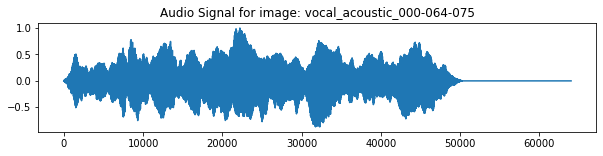

In [62]:
importlib.reload(audio_utils)
importlib.reload(general_utils)
audio_name = 'vocal_acoustic_000-064-075'
audio_data = audio_utils.get_audio_sample_by_name_from_tfrecord(audio_name,'data/nsynth-test.tfrecord')
#print(data)
audio_utils.graph_wav(audio_data, audio_name)


In [9]:
# unpack some spectograms
audio_utils.write_spectograms_parallelized('data/nsynth-test.tfrecord', 'data/nsynth-test-spectrograms', 200)

processed 4050 files out of 4096 in 20 batches

In [11]:
# load the test data
test_files, test_targets, test_target_names = general_utils.load_dataset('data/nsynth-test-spectrograms')